In [74]:
import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv('/content/BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [76]:
#1. What is the range of selling prices in the datasetD
range_of_selling_price = df['selling_price'].max() - df['selling_price'].min()
range_of_selling_price

755000

In [77]:
#2. What is the median selling price for bikes in the datasetD
median_selling_price = df['selling_price'].median()
median_selling_price

45000.0

In [78]:
#3. What is the most common seller type?
most_common_seller = df['seller_type'].value_counts().idxmax()
most_common_seller

'Individual'

In [79]:
#4. How many bikes have driven more than 50,000 kilometers?
number_of_bikes = (df['km_driven']>50000).sum()
print(f"Total number of bike have driven more than 50000 KM are {number_of_bikes}")

Total number of bike have driven more than 50000 KM are 170


In [80]:
#5. What is the average km_driven value for each ownership type?
average_km_driven = df.groupby('owner')['km_driven'].mean()
average_km_driven

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [81]:
#6. What proportion of bikes are from the year 2015 or older?
bikes_older_than_2015 = df[df['year']<=2015]
bikes_older_than_2015

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [82]:
#7. What is the trend of missing values across the dataset?
missing_values_trend = df.isnull().sum()
missing_values_trend

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [83]:
#8.  What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
highest_ex_showroom_price['name']

,name
134,Harley-Davidson Street Bob


In [84]:
#9.  What is the total number of bikes listed by each seller type?
total_number_of_bikes = df.groupby('seller_type')['seller_type'].count()
total_number_of_bikes

,seller_type
seller_type,
Dealer,6
Individual,1055


In [85]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
selling_price = df[df['owner']=='1st owner']
selling_price

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [86]:
#They are negatively correlated
corr = selling_price['selling_price'].corr(selling_price['km_driven'])
corr

np.float64(-0.2434817484496572)

#11. Identify and remove outliers in the km_driven column using the IQR method?

Text(0.5, 1.0, 'Box Plot of Ex-Showrrom Price')

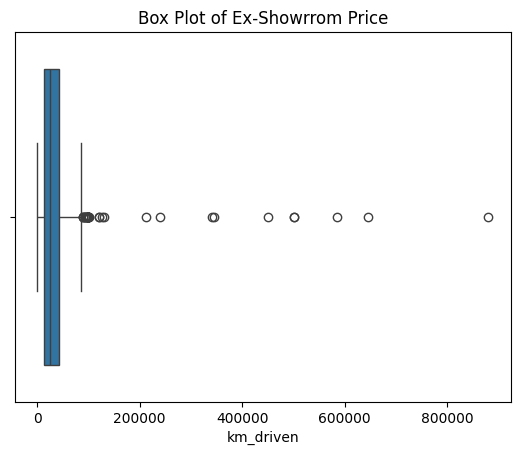

In [87]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = df['km_driven'])
plt.title("Box Plot of Ex-Showrrom Price")

#we can observe that there are alot of outliers in this dataset.

In [88]:
Q1 = np.percentile(df['km_driven'], 25)
Q3 = np.percentile(df['km_driven'], 75)

print("Q1: ", Q1)
print("Q3: ", Q3)

Q1:  13500.0
Q3:  43000.0


In [89]:
IQR = Q3 - Q1
print("The interquartile range is:", IQR)

The interquartile range is: 29500.0


In [90]:
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print("The upper bound is:", upper_bound)
print("The lower bound is:", lower_bound)

The upper bound is: 87250.0
The lower bound is: -30750.0


In [91]:
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


In [92]:
df.shape #outliers are removed

(1022, 7)

#12. Perform a bivariate analysis to visualize the relationship between year and selling_price

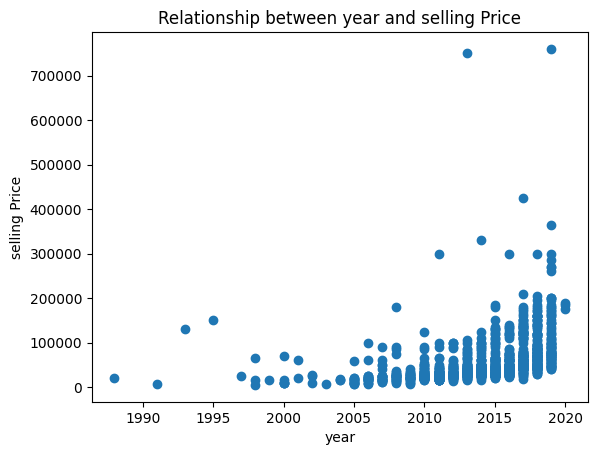

In [93]:
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('year')
plt.ylabel("selling Price")
plt.title("Relationship between year and selling Price")
plt.show()

In [94]:

corr = df['year'].corr(df['selling_price'])
print("Correlation between Year and Selling Price:", corr)
#They are positively correlated.

Correlation between Year and Selling Price: 0.3896859109641992


#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [95]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


#14. Which bike names are priced significantly above the average price for their manufacturing year?

In [96]:
average1 = df[df['selling_price'] >
              df.groupby('year')['selling_price'].transform('mean')]

In [97]:

average1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0
...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0


#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap

In [98]:

df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


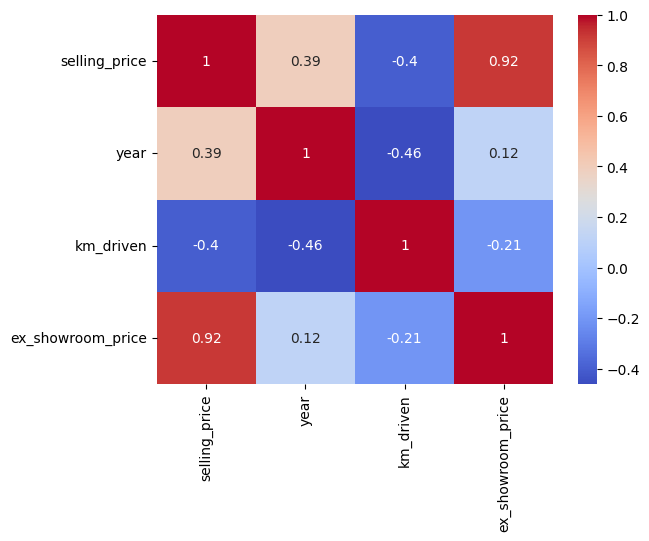

In [99]:

import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop(columns = ['name', 'seller_type', 'owner']).corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [100]:

df2 = pd.read_csv('/content/Car Sale.csv')
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


#EDA2

#Question 1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [101]:
average_price_by_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean()
print("Average selling price for each dealer:\n", average_price_by_dealer)

Average selling price for each dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     2

#Question 2: Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [102]:
price_variation_by_company = df2.groupby('Company')['Price ($)'].std()
highest_variation_company = price_variation_by_company.idxmax()
max_variation_value = price_variation_by_company.max()

print(f"Company with the highest price variation: {highest_variation_company}")
print(f"Highest standard deviation in price: {max_variation_value}")

Company with the highest price variation: Lincoln
Highest standard deviation in price: 19658.050211265567


#Question 3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

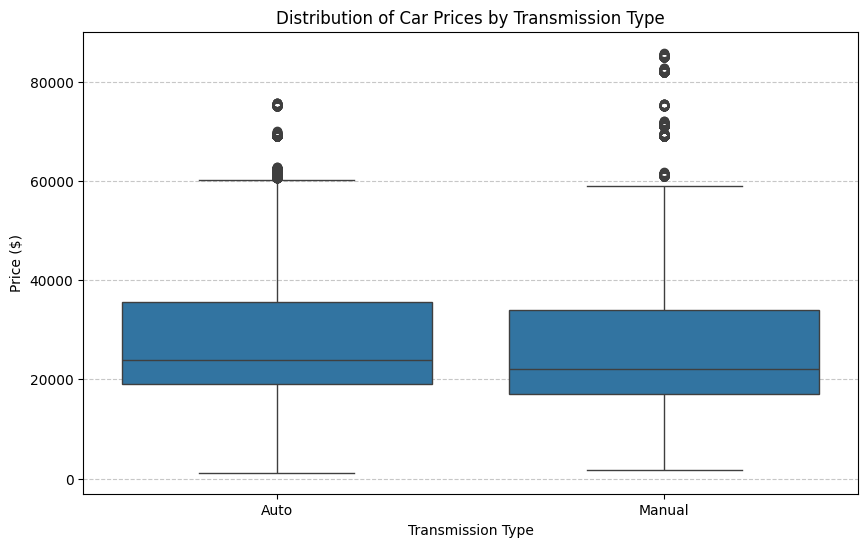


Interquartile Range (IQR) of Price for each Transmission Type:
 Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate box plots for 'Price ($)' by 'Transmission' type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate IQR for 'Price ($)' for each 'Transmission' type
iqrs_by_transmission = df2.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

print("\nInterquartile Range (IQR) of Price for each Transmission Type:\n", iqrs_by_transmission)

#Question 4: What is the distribution of car prices across different regions?

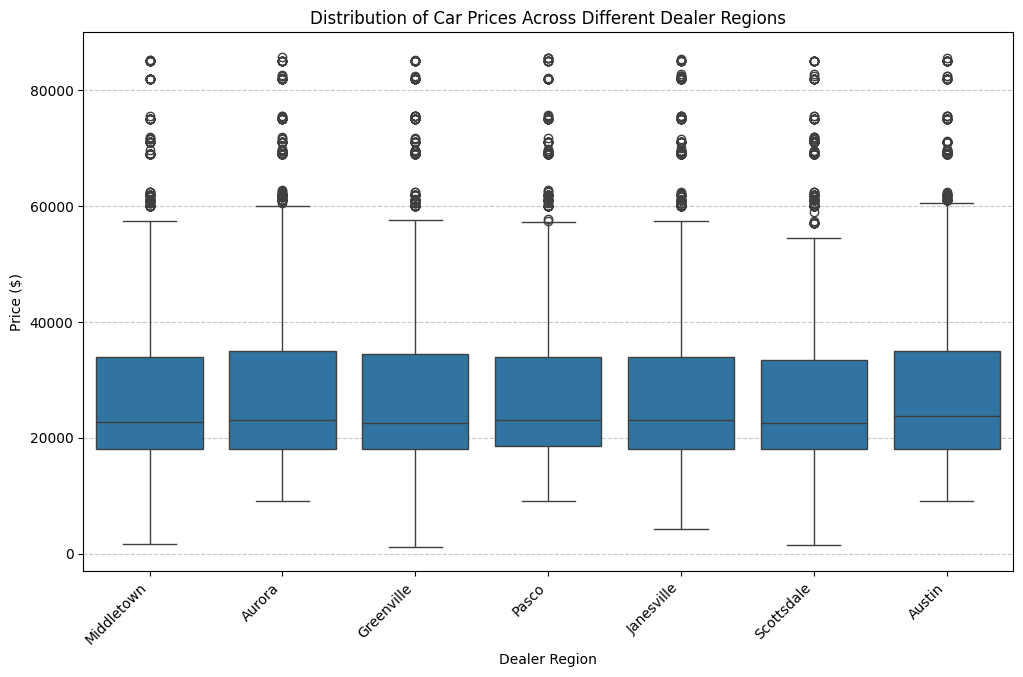

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Car Prices Across Different Dealer Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Question 5: What is the distribution of cars based on body styles?

/tmp/ipython-input-2540984960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='viridis')


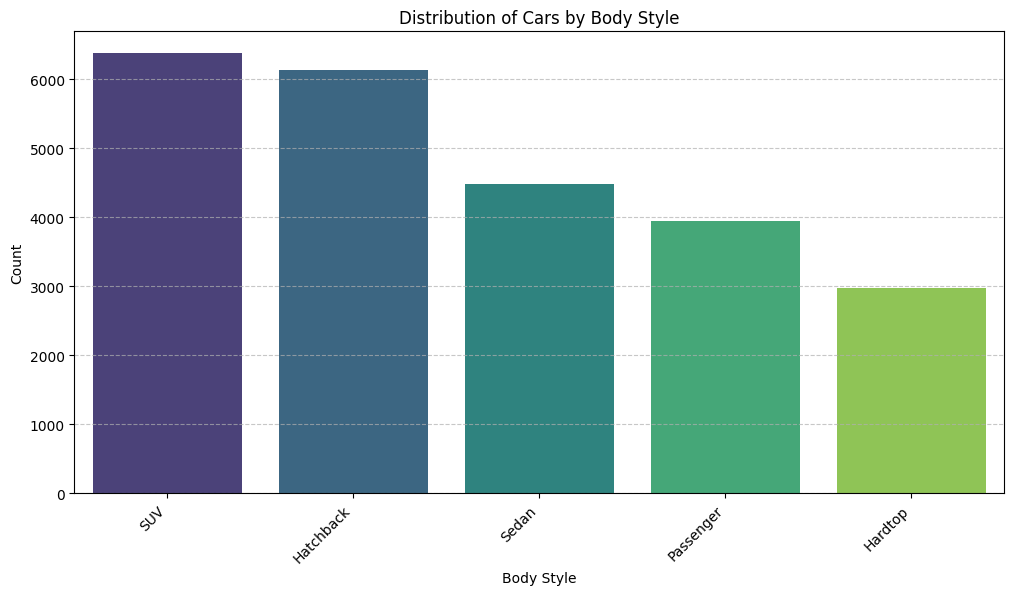

In [105]:
body_style_counts = df2['Body Style'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Question 6: How does the average selling price of cars vary by customer gender and annual income?

In [106]:
df2['Income_Bin'] = pd.qcut(df2['Annual Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df2.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income_Bin
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,High
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Low
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,Very High


In [107]:
average_price_by_gender_income = df2.groupby(['Gender', 'Income_Bin'])['Price ($)'].mean()
print("Average selling price by Gender and Annual Income bin:\n", average_price_by_gender_income)

Average selling price by Gender and Annual Income bin:
 Gender  Income_Bin
Female  Low           28059.801521
        Medium        28353.154717
        High          28309.448449
        Very High     28402.914851
Male    Low           27924.524014
        Medium        27837.224550
        High          28283.473409
        Very High     28091.421784
Name: Price ($), dtype: float64


/tmp/ipython-input-3602548701.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_gender_income = df2.groupby(['Gender', 'Income_Bin'])['Price ($)'].mean()


#Question 7: What is the distribution of car prices by region, and how does the number of cars sold vary by region?

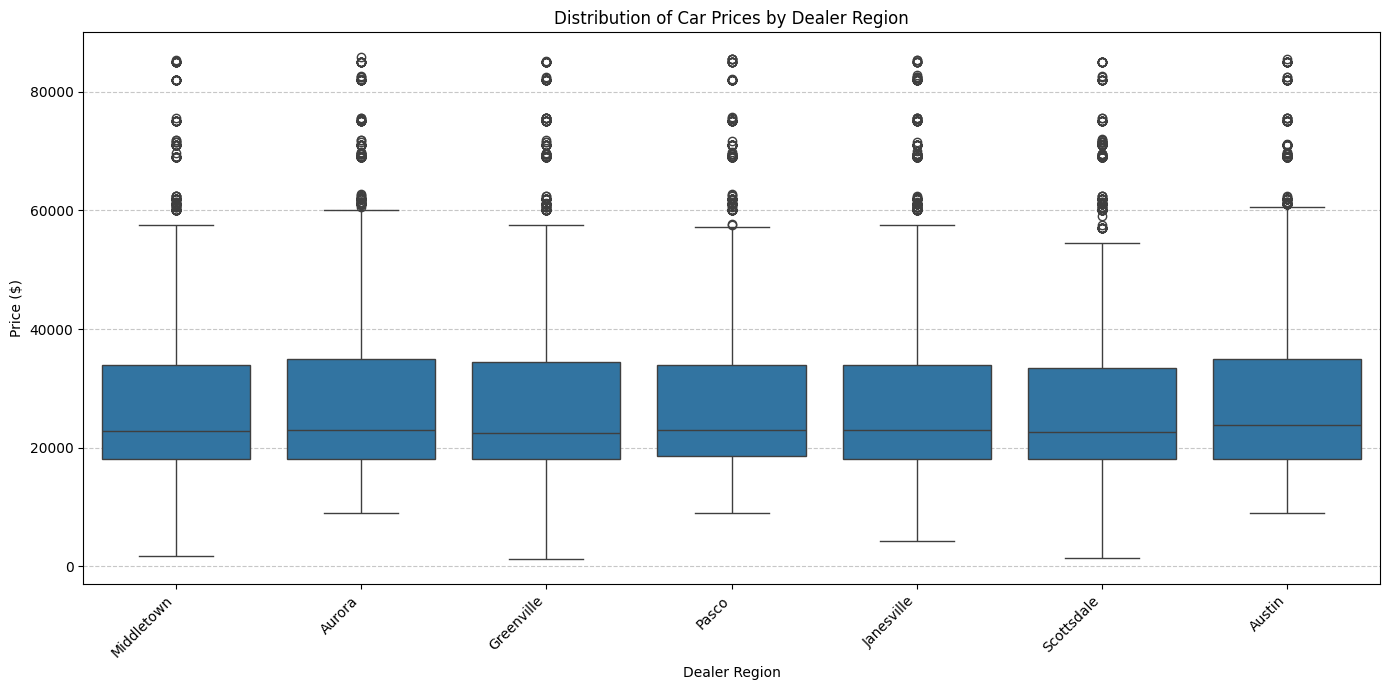

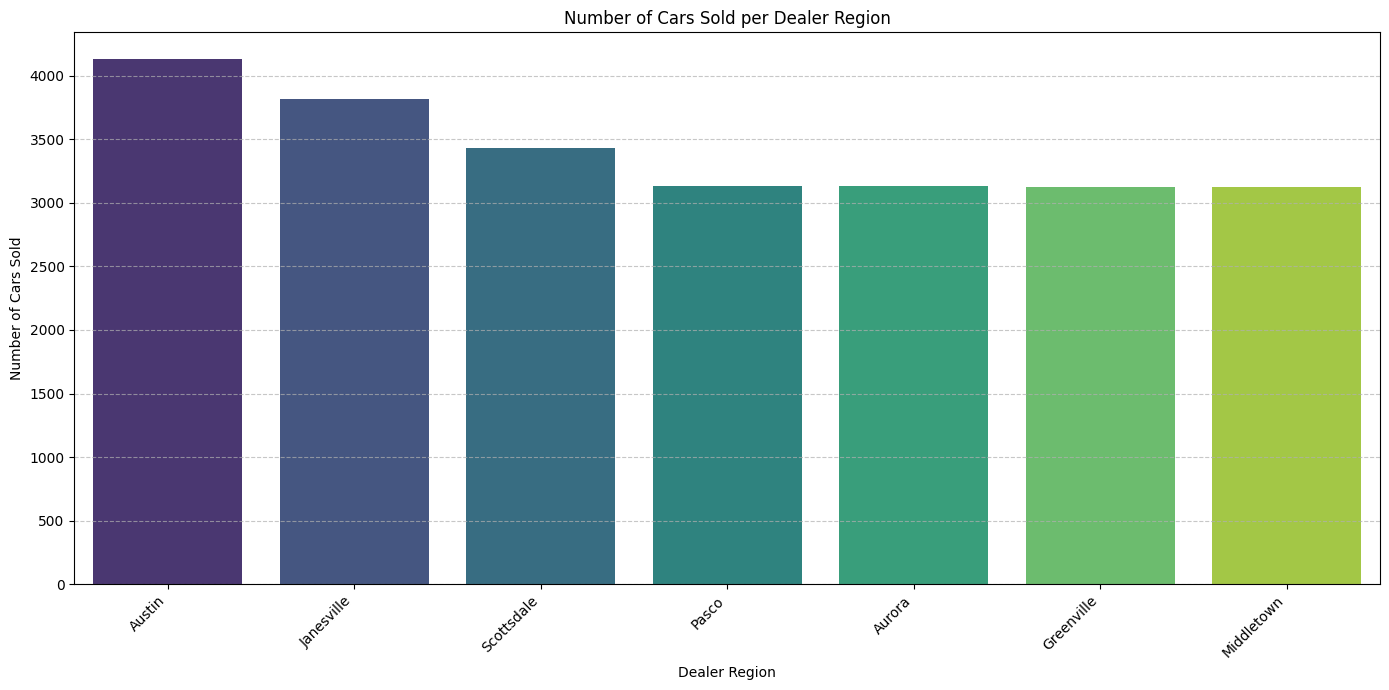

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Car Prices by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

cars_sold_by_region = df2['Dealer_Region'].value_counts()

plt.figure(figsize=(14, 7))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, hue=cars_sold_by_region.index, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Cars Sold per Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Question 8: How does the average car price differ between cars with different engine sizes?

In [109]:
average_price_by_engine = df2.groupby('Engine')['Price ($)'].mean()
print("Average selling price by Engine type:\n", average_price_by_engine)

Average selling price by Engine type:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


#Question 9: How do car prices vary based on the customer’s annual income bracket?

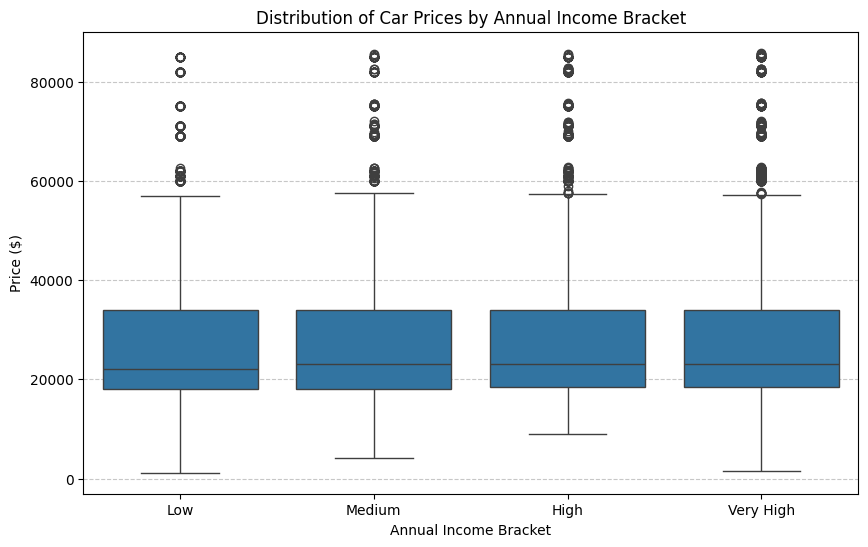

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Bin', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#Question 10: What are the top 5 car models with the highest number of sales, and how does their price distribution look?

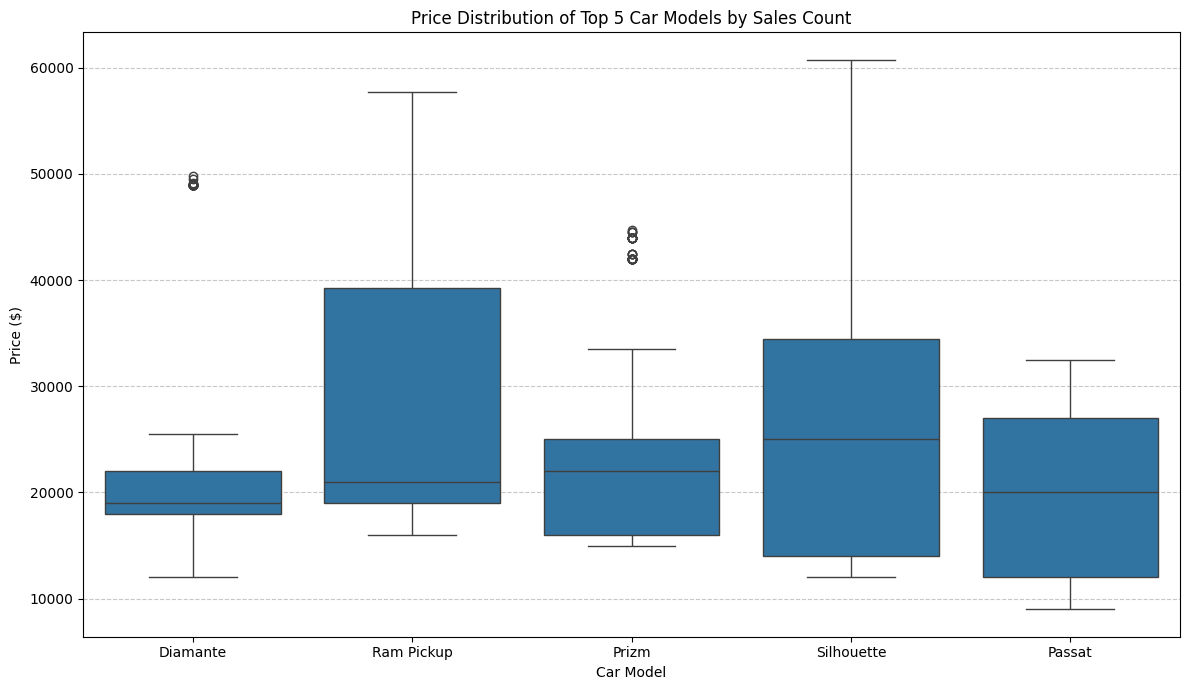

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_models = df2['Model'].value_counts().head(5).index

df_top_models = df2[df2['Model'].isin(top_5_models)]

plt.figure(figsize=(12, 7))
sns.boxplot(x='Model', y='Price ($)', data=df_top_models)
plt.title('Price Distribution of Top 5 Car Models by Sales Count')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#
Question 11: How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [112]:
price_variation_by_engine_color = df2.groupby(['Engine', 'Color'])['Price ($)'].std().unstack()

print("Price variation (standard deviation) by Engine Type and Color:\n", price_variation_by_engine_color)

highest_variation_color_per_engine = price_variation_by_engine_color.idxmax(axis=1)
max_variation_value_per_engine = price_variation_by_engine_color.max(axis=1)

print("\nColor with the highest price variation for each Engine Type:")
for engine, color in highest_variation_color_per_engine.items():
    print(f"  {engine}: {color} (Std Dev: {max_variation_value_per_engine[engine]:.2f})")


Price variation (standard deviation) by Engine Type and Color:
 Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  12418.674126  14402.413401  13499.354247
Overhead Camshaft          17457.405345  13000.103061  17346.642554

Color with the highest price variation for each Engine Type:
  DoubleÂ Overhead Camshaft: Pale White (Std Dev: 14402.41)
  Overhead Camshaft: Black (Std Dev: 17457.41)


#
Question 12: Is there any seasonal trend in car sales based on the date of sale?

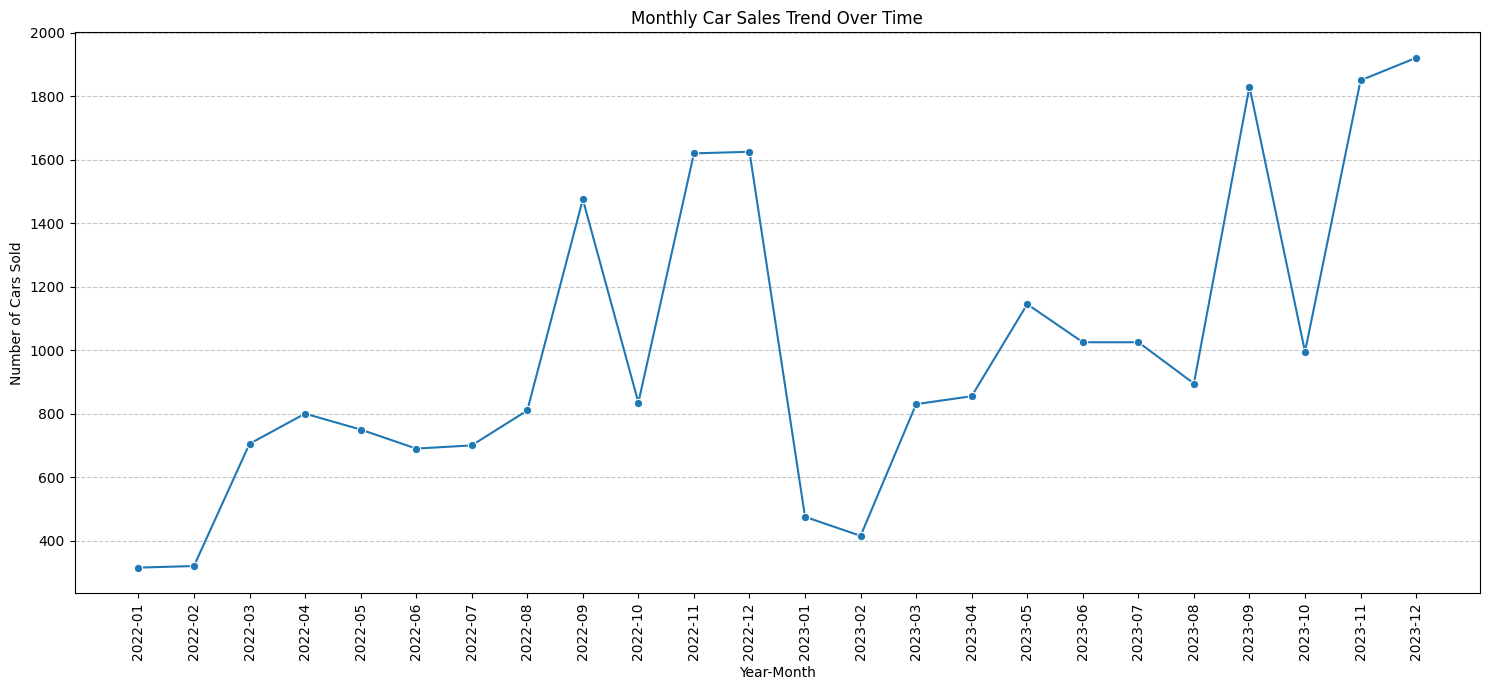

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2['Date'] = pd.to_datetime(df2['Date'])
df2['Sale_Month'] = df2['Date'].dt.month
df2['Sale_Year'] = df2['Date'].dt.year

sales_by_month_year = df2.groupby(['Sale_Year', 'Sale_Month']).size().reset_index(name='Sales_Count')

sales_by_month_year['Year_Month'] = sales_by_month_year['Sale_Year'].astype(str) + '-' + sales_by_month_year['Sale_Month'].astype(str).str.zfill(2)
sales_by_month_year = sales_by_month_year.sort_values(by=['Sale_Year', 'Sale_Month'])

plt.figure(figsize=(15, 7))
sns.lineplot(x='Year_Month', y='Sales_Count', data=sales_by_month_year, marker='o')
plt.title('Monthly Car Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#
Question 13: How does the car price distribution change when considering different combinations of body style and transmission type?

<Figure size 1500x800 with 0 Axes>

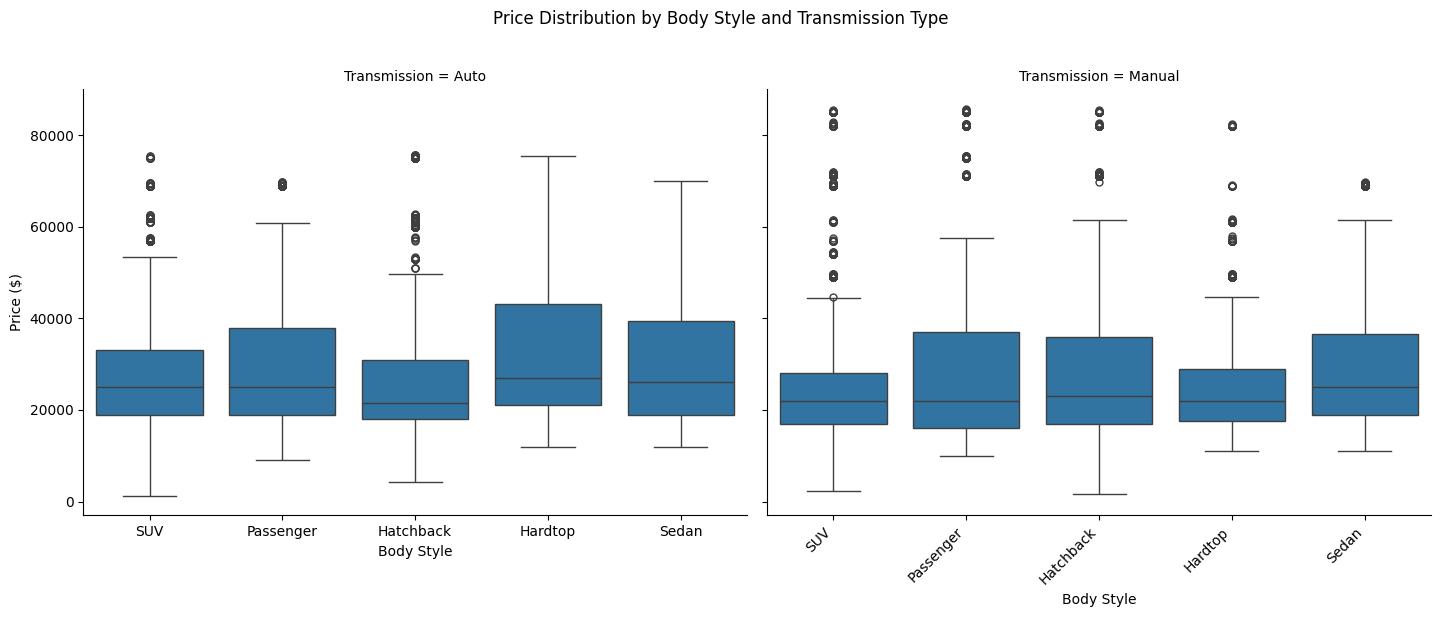

In [114]:
#import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.catplot(x='Body Style', y='Price ($)', col='Transmission', data=df2, kind='box', height=6, aspect=1.2)
plt.suptitle('Price Distribution by Body Style and Transmission Type', y=1.02)
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Question 14: What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [115]:
import pandas as pd

correlation_price_income = df2['Price ($)'].corr(df2['Annual Income'])
print(f"Pearson correlation between Car Price and Annual Income: {correlation_price_income:.2f}")
correlation_by_engine = df2.groupby('Engine')[['Price ($)', 'Annual Income']].corr().unstack().iloc[:, 1]
print("\nCorrelation between Car Price and Annual Income for each Engine Type:\n", correlation_by_engine)


Pearson correlation between Car Price and Annual Income: 0.01

Correlation between Car Price and Annual Income for each Engine Type:
 Engine
DoubleÂ Overhead Camshaft    0.023363
Overhead Camshaft            0.001084
Name: (Price ($), Annual Income), dtype: float64


#Question 15: How does the average car price vary across different car models and engine types?

In [116]:
avg_prices = df2.groupby(['Model', 'Engine'])['Price ($)'].mean()
print(avg_prices)

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


#EDA3

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df3 = pd.read_csv('/content/amazon (1).csv')
df3.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


#1. what is the average rating for each product category?

In [119]:
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
average_rating = df3.groupby('category')['rating'].mean()
print(average_rating)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

#2. What are the top rating_count products by category?

In [120]:
top_rating_products = df3.loc[df3.groupby('category')['rating_count'].idxmax()]
top_rating_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1157,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,"₹2,339","₹4,000",42%,3.8,"1,118",[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,₹294,"₹4,999",94%,4.3,"4,426",【WIDER COMPATIBILITY】This USB C Female to USB ...,"AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...","Naga Sai Gadagottu,Neha Sharma,Amazon Customer...","R3CUNCZTU43JPP,RSO46BN8S4OSU,R2UD5D7T4DZRE5,R2...","Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/rts-Adapter-Charging-Con...
906,B009LJ2BXA,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories|Accessories&Peripherals|...,₹649,₹999,35%,3.5,"7,222",Powerful bass and clear treble sounds|Wired co...,"AFIZUD4UBB67LGWY6CVLRHKA75IA,AG2TD3527KNZZNE46...","Deepthi,Nitin Mishra,Raju Chacko,A.VISWANATHAR...","R392ZYXC6D3GY0,R1MJHZXZ09ETAE,R20PJKJTCF9RXN,R...","Headset,Overall a good product. Sound quality ...","Not a perfect fit for long usage,One problem y...",https://m.media-amazon.com/images/I/31eE6slx4E...,https://www.amazon.in/HP-B4B09PA-Headphones-wi...
772,B08HD7JQHX,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹499,60%,3.3,"2,804",SOUND RECORDING: With the Miracle Sound Microp...,"AFILRU3X2FCDPDW5UKLT6C7OPJSA,AFWTGD4FCS2E2U2TD...","Afrina Hasnat,BKBasu,Ayush Raghuvanshi,Wilfrie...","REQ74ZVYY2I01,R15RS7QIKMBY5Z,RCYHKHTW0MAL8,R1A...","No TRRS to TRS converter in the box,Not suitab...",This mic's sound quality is very good but if y...,https://m.media-amazon.com/images/I/41T3Z43M4y...,https://www.amazon.in/HUMBLE-Dynamic-Recording...
844,B08K9PX15C,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,Computers&Accessories|Accessories&Peripherals|...,₹849,"₹1,499",43%,4.0,"7,352",The 2.0 speaker has a versatile design that ca...,"AFC7Q5Q64XM2Y64FT7Y3L2YVALRA,AG7C5TFPIBMWQQC2S...","Balamurugan Trivandrum,prathmesh sawant,Pravee...","R2USVKN5VQX7ZL,R36O11JTBG8NKH,R1OC5OKQ1ZHRT4,R...",Nice product from Zebronics... Using for lapto...,Zebronics Product is always good. I bought thi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Zebronics-Wonderbar-Powe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,B07KCMR8D6,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,₹50,₹50,0%,4.3,"5,792",5 vibrant Neon body color|Smooth and fast writ...,"AEVPRYZLGHNMEZA5BYGIX36LYZXA,AEZPOZQEEBFFXZ2EQ...","Gatij saini,Biswajit Kundu,Altaf Khan,Agam Sar...","RZAAQFY7BDSWC,R3604ZO2AA4PK5,R3C8K6Z6W9MDTQ,R3...","Nice ball pen,Good product,Average,Nice Pen,It...","Very nice ball pen,Thank you Amazon,Easy to ho...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Classmate-Octane-Neon-Pa...
993,B00S2SEV7K,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",OfficeProducts|OfficePaperProducts|Paper|Stati...,₹90,₹100,10%,4.1,"6,199",Unique patented thermo-sensitive Frixion Ink|A...,"AFSJUWV2I4CD53EPCRMOQJ3CWR3Q,AGLYAYWTFPPMLELDG...","Abhay Gupta,vimal rastogi,Sughnesha,Prityush,A...","R1QL22IXTM3HYM,R2BCCQQCMW4X56,R8MW9P91PIMJ3,R1...","Good... 😊,Nice pen but it has some problems.,A...",Bahut aacha hai ye pen

#3. What is the distribution of discounted prices vs actual prices?

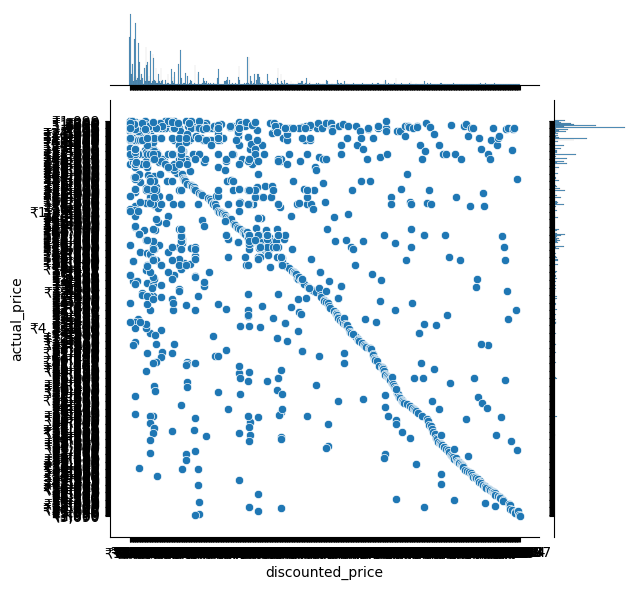

In [121]:
sns.jointplot(x = 'discounted_price', y = 'actual_price', data = df3, kind = 'scatter')
plt.show()

#4. How does the average discount percentage vary across categories?

In [122]:
df3['discount_percentage'] = df3['discount_percentage'].str.rstrip('%').astype(int)
average_discount_percentage = df3.groupby('category')['discount_percentage'].mean()
print(average_discount_percentage)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

#5. What are the most popular product name?

In [123]:
popular_products = df3['product_name'].value_counts()
print(popular_products.head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                            

#6. what are the most popular product keywords?

In [124]:
import pandas as pd
from collections import Counter
all_words = df3['product_name'].str.lower().str.split()
flat_words = [word for sublist in all_words for word in sublist]
word_counts = Counter(flat_words)
popular_keywords = word_counts.most_common(20)
print(popular_keywords)

[('with', 751), ('for', 672), ('|', 457), ('&', 432), ('usb', 377), ('and', 330), ('cable', 320), ('-', 220), ('charging', 219), ('to', 218), ('fast', 211), ('(black)', 187), ('c', 182), ('smart', 171), ('type', 144), ('compatible', 138), ('tv', 138), ('data', 131), ('hd', 130), ('in', 118)]


#7. what are the most popular product reviews?

In [125]:
popular_reviews = df3['review_title'].value_counts()
print(popular_reviews.head(10))

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good pro

#8. What is the correlation between discounted_price and rating?

In [126]:
df3['discounted_price'] = (
    df3['discounted_price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

corr = df3['discounted_price'].corr(df3['rating'])
print(corr)


0.12033741712288548


#9. What are the Top 5 categories based on teh highest ratings?

In [127]:
top_5_categories_by_rating = df3.groupby('category')['rating'].mean().nlargest(5)
print(top_5_categories_by_rating)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


#10. Identify any potential areas for improvement or optimization based on the data analysis.

#EDA4

In [128]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
df4 = pd.read_csv('/content/spotify.csv')
df4.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


#1. Read the datarame, check null value if present then do the needful, check duplicate row, if present then do the needful

In [130]:

df4.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

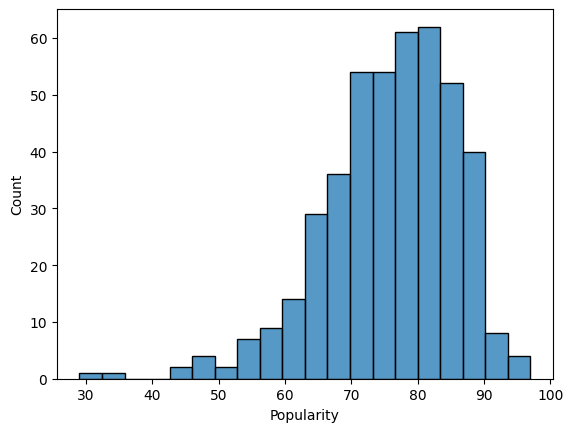

In [131]:
sns.histplot(df4['Popularity'])
plt.show()


#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

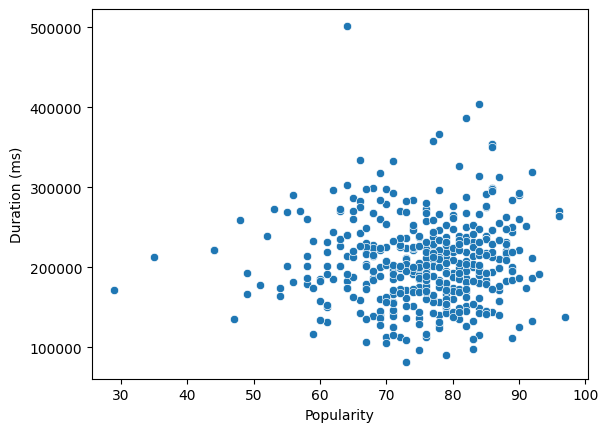

In [132]:
sns.scatterplot(x = 'Popularity', y = 'Duration (ms)', data = df4)
plt.show()

#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

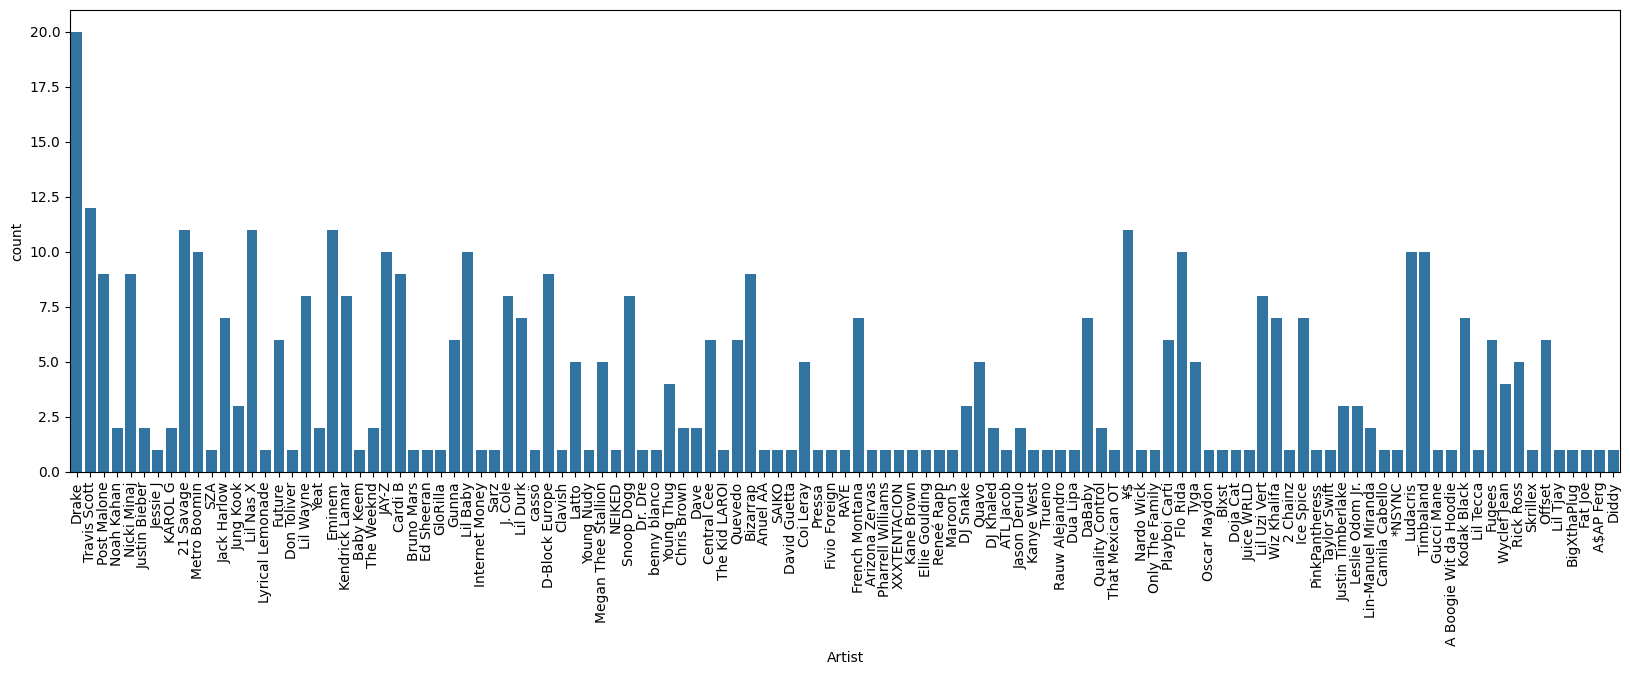

In [133]:
plt.figure(figsize = (20, 6))
sns.countplot(df4, x = 'Artist')
plt.xticks(rotation = 90)
plt.show()

#5. what are the top5 least popular tracks in the dataset? Provide the artist name and track for each artist using a countplot

In [134]:
least_popular = df4.sort_values(by = 'Popularity', ascending = True).head(5)
print(least_popular[['Artist', 'Track Name', 'Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [135]:
least_popular['artist_track'] = least_popular['Artist'] + ' - ' + least_popular['Track Name']
print(least_popular['artist_track'])


207    Pressa - Attachments (feat. Coi Leray)
231                Justin Bieber - Intentions
413          French Montana - Splash Brothers
435          French Montana - Splash Brothers
225                  Lil Baby - On Me - Remix
Name: artist_track, dtype: object


/tmp/ipython-input-1058169575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'artist_track', data = least_popular, palette = 'viridis')


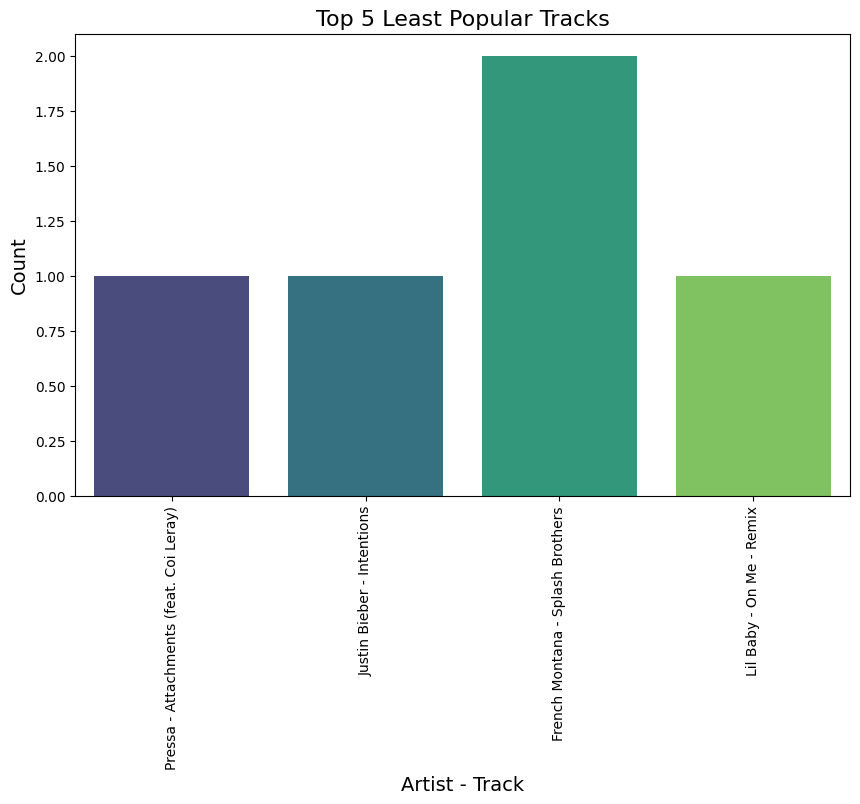

In [136]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'artist_track', data = least_popular, palette = 'viridis')
plt.title("Top 5 Least Popular Tracks", fontsize = 16)
plt.xlabel('Artist - Track', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()


#6. Among the top5 most popular artist, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [137]:
average_popularity_per_artist = df4.groupby('Artist')['Popularity'].mean()
print(average_popularity_per_artist)

Artist
*NSYNC                    67.000000
2 Chainz                  72.000000
21 Savage                 84.181818
A Boogie Wit da Hoodie    80.000000
A$AP Ferg                 69.000000
                            ...    
Young Nudy                67.000000
Young Thug                73.750000
benny blanco              72.000000
cassö                     92.000000
¥$                        86.090909
Name: Popularity, Length: 115, dtype: float64


In [138]:

top_5_popular_artists = average_popularity_per_artist.nlargest(5)
print("Top 5 most popular artists based on average popularity:")
print(top_5_popular_artists)


Top 5 most popular artists based on average popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


#7. For the top 5 most popular artist, what are their most popular tracks? List the track name for each artist

In [139]:

most_popular_tracks = {}
for artist in top_5_popular_artists.index:
    artist_tracks = df4[df4['Artist'] == artist]
    if not artist_tracks.empty:
        most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
        most_popular_tracks[artist] = most_popular_track['Track Name']

print("Most popular track for each of the top 5 artists:")
for artist, track in most_popular_tracks.items():
    print(f"Artist: {artist}, Most Popular Track: {track}")

Most popular track for each of the top 5 artists:
Artist: cassö, Most Popular Track: Prada
Artist: Trueno, Most Popular Track: Mamichula - con Nicki Nicole
Artist: David Guetta, Most Popular Track: Baby Don't Hurt Me
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti)
Artist: ¥$, Most Popular Track: CARNIVAL


#8. Visualize relationships between multiple numerical varibale simultaneously using a pair plot.

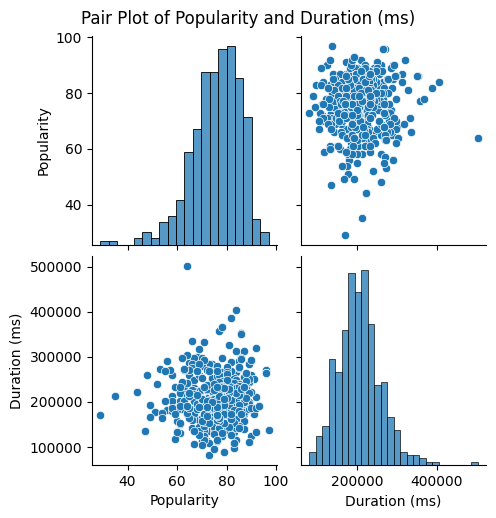

In [140]:
sns.pairplot(df4[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Popularity and Duration (ms)', y=1.02)
plt.show()

#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

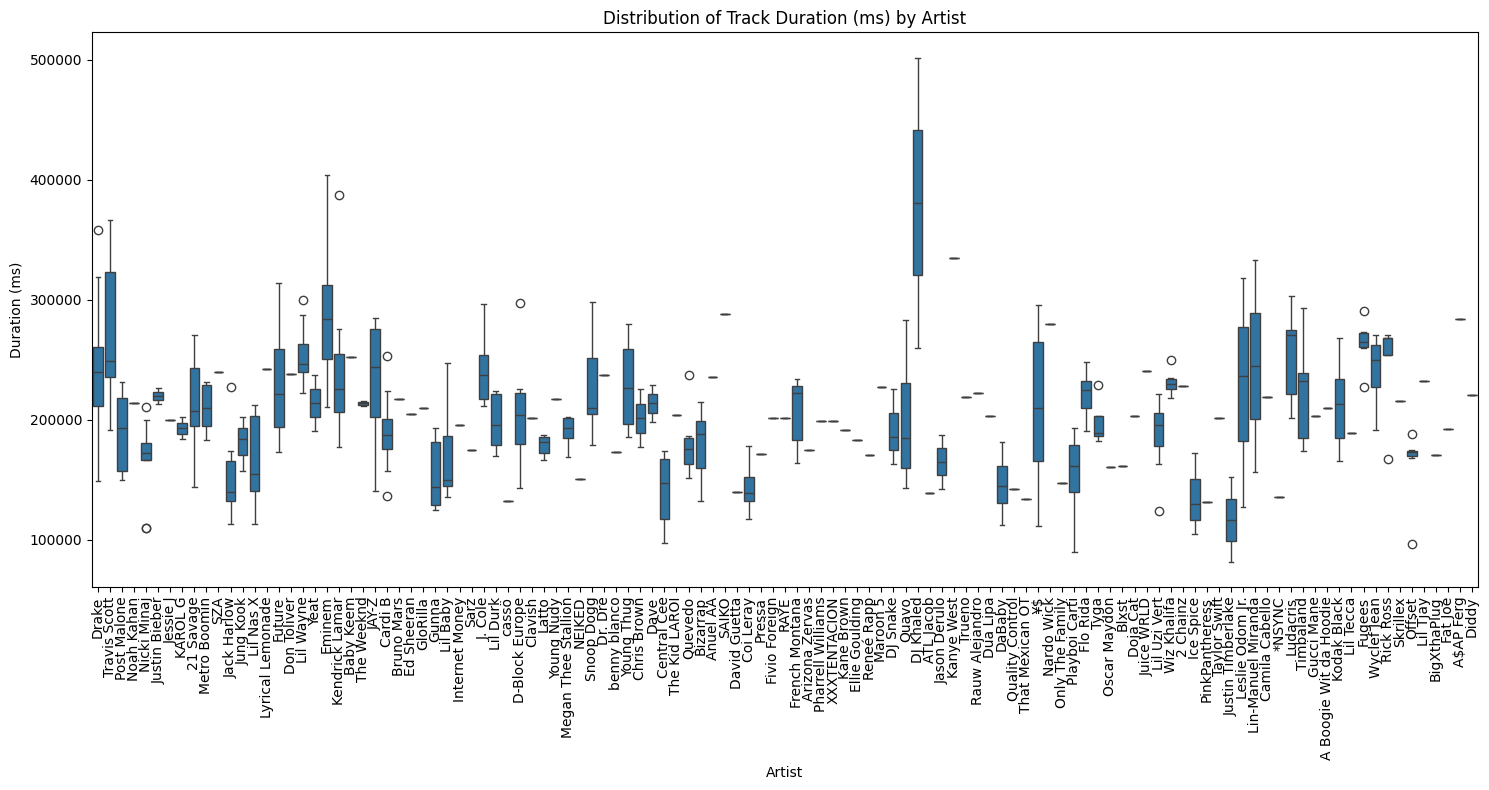

In [141]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df4)
plt.title('Distribution of Track Duration (ms) by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot r a violin plot.

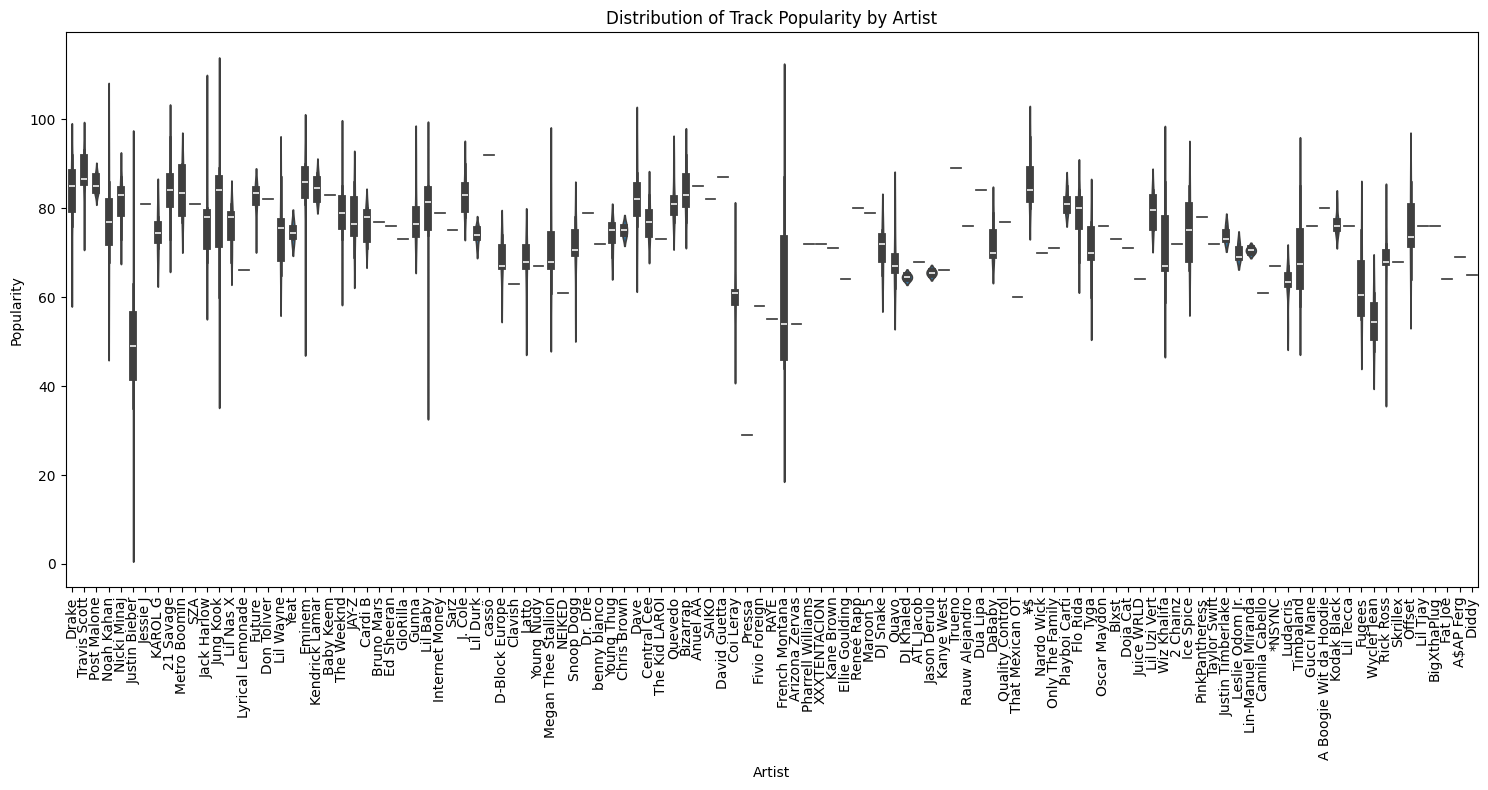

In [142]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Artist', y='Popularity', data=df4)
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()